
1. **SARIMA and SARIMAX Analysis**:
   - Data visualization (plotting the time series).
   - Stationarity check and making the series stationary if needed.
   - ACF and PACF plots to determine AR and MA terms.
   - SARIMA model training and prediction.
   - SARIMAX model if exogenous variables are needed.
   


2. **Facebook Prophet**:
   - Preparing the data for Prophet (renaming columns).
   - Model fitting and forecasting.
   - Visualizing the predictions.
   


3. **Recurrent Neural Networks (RNNs)**:
   - Data preprocessing for RNNs.
   - Building and training the RNN model.
   - Predictions and evaluation.
   
Let's start with the first part: SARIMA and SARIMAX analysis.



# Time Series Analysis with SARIMA, SARIMAX, Facebook Prophet, and RNNs



In this notebook, we'll walk through different methods of time series analysis and forecasting using the provided dataset.

## Table of Contents:
1. [SARIMA and SARIMAX Analysis](#SARIMA-and-SARIMAX-Analysis)
2. [Facebook Prophet Analysis](#Facebook-Prophet-Analysis)
3. [Recurrent Neural Networks (RNNs)](#Recurrent-Neural-Networks)

---



### SARIMA and SARIMAX Analysis



#### Visualizing the Data

First, let's visualize the time series data to understand its patterns and trends.


In [1]:
from capstone_functions import *

# Load the dataset
master_df = pd.read_parquet("../Data/master_df.parquet")

# Set the random.seed(42)
np.random.seed(42)

# sns.set_style('538')


Versions used in this notebook:
Python version: 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.7.2
Scipy version: 1.10.1
Statsmodels version: 0.14.0
SKLearn version: 1.2.2


In [10]:
# Creating subplots vertically aligned
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Daily Confirmed", "Daily Hospitalizations", "Daily Fatalities"))

# Adding traces for each subplot
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_confirmed'], name='Daily Confirmed'), row=1, col=1)
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_hospitalized_patients'], name='Daily Hospitalizations'), row=2, col=1)
fig.add_trace(go.Scatter(x=master_df.index, y=master_df['new_fatal'], name='Daily Fatalities'), row=3, col=1)

# Update the layout
fig.update_layout(height=800, width=1000, title='Daily Confirmed Cases, Hospitalizations, and Fatalities over Time')
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='Daily Confirmed Cases', row=1, col=1)
fig.update_yaxes(title_text='Daily Hospitalizations', row=2, col=1)
fig.update_yaxes(title_text='Daily Fatalities', row=3, col=1)

fig.show()


In [11]:
# Performing seasonal decomposition on 'new_confirmed' column
decomposition = tsa.seasonal_decompose(master_df['new_confirmed'], model='additive', period=12)

# Adding the decomposition data to the dataframe
master_df["Trend"] = decomposition.trend
master_df["Seasonal"] = decomposition.seasonal
master_df["Residual"] = decomposition.resid


In [12]:

# Creating subplots for the trend, seasonal, and residual components
cols = ["Trend", "Seasonal", "Residual"]
fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Scatter(x=master_df.index, y=master_df[col], name=col), row=i+1, col=1)

fig.update_layout(height=800, width=1200, title='Seasonal Decomposition of Daily Confirmed Cases')
fig.show()



#### Checking Stationarity
Before applying SARIMA, it's essential to ensure our time series is stationary.


In [6]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    return dfoutput

check_stationarity(master_df['new_confirmed'])



Test Statistic                   -4.769730
p-value                           0.000062
#Lags Used                       21.000000
Number of Observations Used    1120.000000
dtype: float64


If the `p-value` is less than 0.05, the series is stationary. Otherwise, you might need to take differences or transformations to make it stationary.



#### ACF and PACF plots
To determine the order of the AR and MA terms, we can plot the autocorrelation and partial autocorrelation charts.


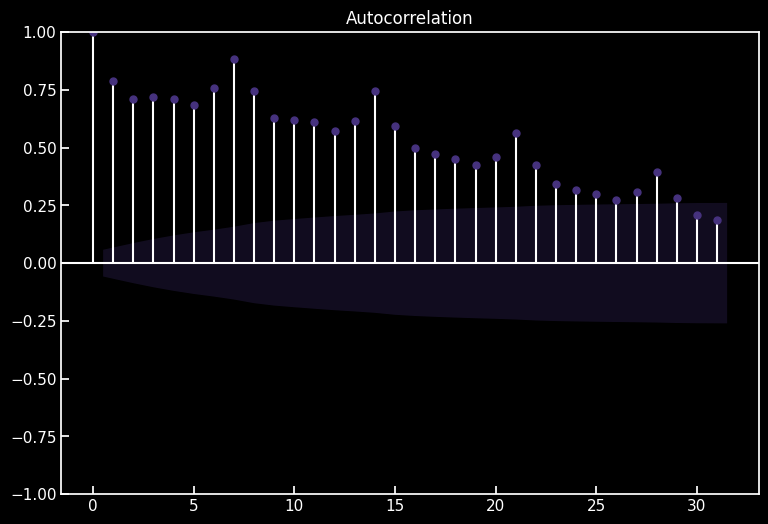

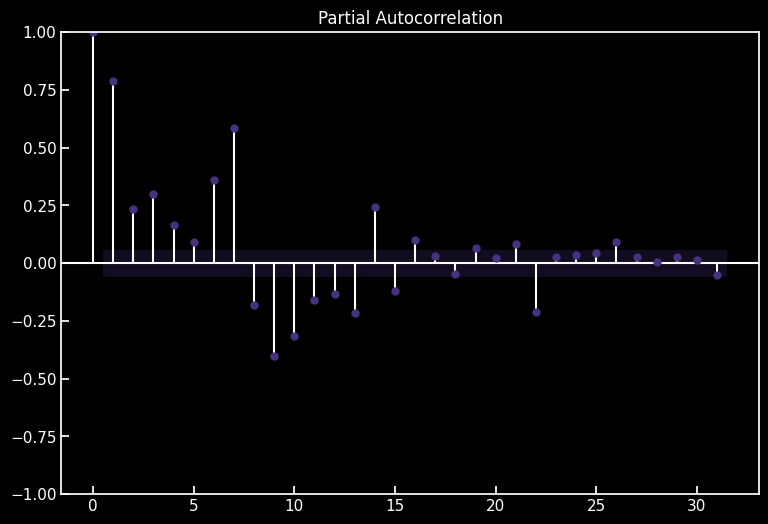

In [8]:
plot_acf(master_df['new_confirmed'].dropna())
plot_pacf(master_df['new_confirmed'].dropna())
plt.show()




From the plots, we can determine the AR and MA terms by noting where the plot crosses the upper confidence interval for the first time.



#### SARIMA Model Training and Prediction

Once we have our terms, we can train our SARIMA model.


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(master_df['new_confirmed'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()
predictions = results.predict(start=start_date, end=end_date)



NameError: name 'p' is not defined


#### SARIMAX Model (if using exogenous variables)

If we want to use external predictors, SARIMAX is the way to go.


In [ ]:


exog_variables = master_df[['exog1', 'exog2']]
model = SARIMAX(master_df['new_confirmed'], exog=exog_variables, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()
predictions = results.predict(start=start_date, end=end_date, exog=new_exog_data)




### Facebook Prophet Analysis

Facebook Prophet is designed for forecasting time series data. Let's see how we can use it.



#### Preparing Data for Prophet

Prophet requires the dataset to have two columns: `ds` and `y`, where `ds` is the timestamp and `y` is the value we want to predict.


In [ ]:


from fbprophet import Prophet

# Preparing data
prophet_df = master_df.reset_index()[['date', 'new_confirmed']]
prophet_df.columns = ['ds', 'y']

# Create and fit model
model = Prophet()
model.fit(prophet_df)

# Predictions
future = model.make_future_dataframe(periods=number_of_days_to_predict)
forecast = model.predict(future)
model.plot(forecast)




### Recurrent Neural Networks (RNNs)

RNNs are suitable for time series prediction due to their ability to recognize patterns in sequences of data.



#### Data Preprocessing for RNNs


In [ ]:


from sklearn.preprocessing import MinMaxScaler

data = master_df['new_confirmed'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for training
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])




#### Building and Training the RNN


In [ ]:


from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)




#### Predictions and Evaluation


In [ ]:


scaled_predictions = model.predict(X_test)
predictions = scaler.inverse_transform(scaled_predictions)




---

This outline gives a clear walkthrough of the different steps involved in each method. Depending on the specific details of your dataset and the problem at hand, you might need to adjust and fine-tune some of these steps.